# 如何切换不同的联邦算法？

这里以FedProx(Li Tian等人于2018年提出)[论文地址](https://arxiv.org/abs/1812.06127)为例子，来向大家介绍如何使用FLGo来在同一个联邦任务上运行不同的联邦算法。

In [ ]:
import flgo.algorithm.fedprox as fedprox
import flgo.algorithm.fedavg as fedavg
import os
import flgo

### 生成联邦任务 \ Generate Federated Task

生成Synthetic(0.5,0.5)-30个用户的数据集

In [ ]:
task = './test_synthetic'
config = {'benchmark':{'name':'flgo.benchmark.synthetic_regression', 'para':{'alpha':0.5, 'beta':0.5, 'num_clients':30}}}
if not os.path.exists(task): flgo.gen_task(config, task_path = task)

### 运行联邦算法 \ Running Federated Algorithms 

In [ ]:
option = {'num_rounds':200, 'num_epochs':5, 'batch_size':10, 'learning_rate':0.1, 'gpu':0}
fedavg_runner = flgo.init(task, fedavg, option=option)
fedprox_runner = flgo.init(task, fedprox, option=option)
fedavg_runner.run()
fedprox_runner.run()

### 结果分析 \ Result Analysis

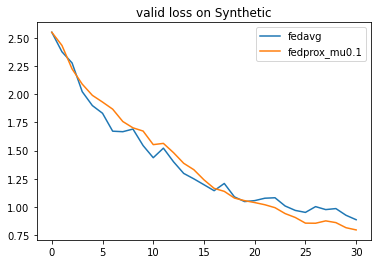

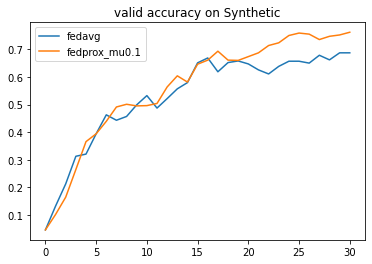

In [4]:
import flgo.experiment.analyzer
analysis_plan = {
    'Selector':{
        'task': task,
        'header':['fedavg', 'fedprox']
    },
    'Painter':{
        'Curve':[
            {'args':{'x': 'communication_round', 'y':'val_loss'}, 'fig_option':{'title':'valid loss on Synthetic'}},
            {'args':{'x': 'communication_round', 'y':'val_accuracy'},  'fig_option':{'title':'valid accuracy on Synthetic'}},
        ]
    }
}
flgo.experiment.analyzer.show(analysis_plan)